In [1]:
import requests
import json
import pandas as pd
import numpy as np

# Free API 1: CoinDesk 
Bitcoin Price Index (BPI) in real-time.

In [2]:
r = requests.get('https://api.coindesk.com/v1/bpi/currentprice.json')

In [3]:
r.json

<bound method Response.json of <Response [200]>>

In [4]:
r.status_code
#(200 is OK, 404 is Not Found)

200

In [5]:
print(r.json())
data = r.json

{'time': {'updated': 'Sep 21, 2021 12:54:00 UTC', 'updatedISO': '2021-09-21T12:54:00+00:00', 'updateduk': 'Sep 21, 2021 at 13:54 BST'}, 'disclaimer': 'This data was produced from the CoinDesk Bitcoin Price Index (USD). Non-USD currency data converted using hourly conversion rate from openexchangerates.org', 'chartName': 'Bitcoin', 'bpi': {'USD': {'code': 'USD', 'symbol': '&#36;', 'rate': '43,302.3003', 'description': 'United States Dollar', 'rate_float': 43302.3003}, 'GBP': {'code': 'GBP', 'symbol': '&pound;', 'rate': '31,656.0600', 'description': 'British Pound Sterling', 'rate_float': 31656.06}, 'EUR': {'code': 'EUR', 'symbol': '&euro;', 'rate': '36,869.5704', 'description': 'Euro', 'rate_float': 36869.5704}}}


In [6]:
def json_print(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

json_print(r.json())

{
    "bpi": {
        "EUR": {
            "code": "EUR",
            "description": "Euro",
            "rate": "36,869.5704",
            "rate_float": 36869.5704,
            "symbol": "&euro;"
        },
        "GBP": {
            "code": "GBP",
            "description": "British Pound Sterling",
            "rate": "31,656.0600",
            "rate_float": 31656.06,
            "symbol": "&pound;"
        },
        "USD": {
            "code": "USD",
            "description": "United States Dollar",
            "rate": "43,302.3003",
            "rate_float": 43302.3003,
            "symbol": "&#36;"
        }
    },
    "chartName": "Bitcoin",
    "disclaimer": "This data was produced from the CoinDesk Bitcoin Price Index (USD). Non-USD currency data converted using hourly conversion rate from openexchangerates.org",
    "time": {
        "updated": "Sep 21, 2021 12:54:00 UTC",
        "updatedISO": "2021-09-21T12:54:00+00:00",
        "updateduk": "Sep 21, 2021 at 13:54 BST

In [7]:
with open('public.json','w') as f:
    json.dump(r.json(),f)

In [8]:
with open('public.json') as json_data:
    data1 = json.load(json_data)
data1 = data1['bpi']

In [9]:
data

<bound method Response.json of <Response [200]>>

In [10]:
df = pd.DataFrame(data1)

In [11]:
df

,USD,GBP,EUR
code,USD,GBP,EUR
symbol,&#36;,&pound;,&euro;
rate,"43,302.3003","31,656.0600","36,869.5704"
description,United States Dollar,British Pound Sterling,Euro
rate_float,43302.3,31656.1,36869.6


In [12]:
df1 = df.transpose()
df1

,code,symbol,rate,description,rate_float
USD,USD,&#36;,"43,302.3003",United States Dollar,43302.3
GBP,GBP,&pound;,"31,656.0600",British Pound Sterling,31656.1
EUR,EUR,&euro;,"36,869.5704",Euro,36869.6


In [13]:
df1 = df1.set_index('code')
df1

,symbol,rate,description,rate_float
code,,,,
USD,&#36;,"43,302.3003",United States Dollar,43302.3
GBP,&pound;,"31,656.0600",British Pound Sterling,31656.1
EUR,&euro;,"36,869.5704",Euro,36869.6


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

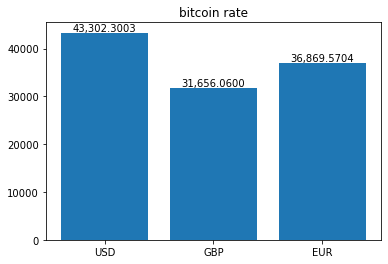

In [15]:
plt.bar(df1.index, df1['rate_float'])

for i in range(len(df1)):
    plt.annotate(df1.rate[i], xy=(list(df1.index)[i],df1.rate_float[i]), ha='center', va='bottom')
    
plt.title('bitcoin rate')
plt.show


# Free API 2: Data USA
US public data (e.g., population data, etc.).

In [16]:
response = requests.get("https://datausa.io/api/data?drilldowns=Nation&measures=Population")

In [17]:
response.status_code

200

In [18]:
print(response.json())

{'data': [{'ID Nation': '01000US', 'Nation': 'United States', 'ID Year': 2019, 'Year': '2019', 'Population': 328239523, 'Slug Nation': 'united-states'}, {'ID Nation': '01000US', 'Nation': 'United States', 'ID Year': 2018, 'Year': '2018', 'Population': 327167439, 'Slug Nation': 'united-states'}, {'ID Nation': '01000US', 'Nation': 'United States', 'ID Year': 2017, 'Year': '2017', 'Population': 325719178, 'Slug Nation': 'united-states'}, {'ID Nation': '01000US', 'Nation': 'United States', 'ID Year': 2016, 'Year': '2016', 'Population': 323127515, 'Slug Nation': 'united-states'}, {'ID Nation': '01000US', 'Nation': 'United States', 'ID Year': 2015, 'Year': '2015', 'Population': 321418821, 'Slug Nation': 'united-states'}, {'ID Nation': '01000US', 'Nation': 'United States', 'ID Year': 2014, 'Year': '2014', 'Population': 318857056, 'Slug Nation': 'united-states'}, {'ID Nation': '01000US', 'Nation': 'United States', 'ID Year': 2013, 'Year': '2013', 'Population': 316128839, 'Slug Nation': 'united

In [19]:
def json_print(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

json_print(response.json())

{
    "data": [
        {
            "ID Nation": "01000US",
            "ID Year": 2019,
            "Nation": "United States",
            "Population": 328239523,
            "Slug Nation": "united-states",
            "Year": "2019"
        },
        {
            "ID Nation": "01000US",
            "ID Year": 2018,
            "Nation": "United States",
            "Population": 327167439,
            "Slug Nation": "united-states",
            "Year": "2018"
        },
        {
            "ID Nation": "01000US",
            "ID Year": 2017,
            "Nation": "United States",
            "Population": 325719178,
            "Slug Nation": "united-states",
            "Year": "2017"
        },
        {
            "ID Nation": "01000US",
            "ID Year": 2016,
            "Nation": "United States",
            "Population": 323127515,
            "Slug Nation": "united-states",
            "Year": "2016"
        },
        {
            "ID Nation": "01000US",
      

In [20]:
with open('usa_data.json','w') as f:
    json.dump(response.json(),f)

In [21]:
with open('usa_data.json') as json_data:
    data2 = json.load(json_data)
data2 = data2['data']

In [22]:
df2 = pd.DataFrame(data2)

In [23]:
df2

,ID Nation,Nation,ID Year,Year,Population,Slug Nation
0,01000US,United States,2019,2019,328239523,united-states
1,01000US,United States,2018,2018,327167439,united-states
2,01000US,United States,2017,2017,325719178,united-states
3,01000US,United States,2016,2016,323127515,united-states
4,01000US,United States,2015,2015,321418821,united-states
5,01000US,United States,2014,2014,318857056,united-states
6,01000US,United States,2013,2013,316128839,united-states


In [24]:
df2.drop('ID Year', axis = 1, inplace = True)
df2

,ID Nation,Nation,Year,Population,Slug Nation
0,01000US,United States,2019,328239523,united-states
1,01000US,United States,2018,327167439,united-states
2,01000US,United States,2017,325719178,united-states
3,01000US,United States,2016,323127515,united-states
4,01000US,United States,2015,321418821,united-states
5,01000US,United States,2014,318857056,united-states
6,01000US,United States,2013,316128839,united-states


In [25]:
df2 = df2.sort_values(by = "Year", ascending = True)

Text(0.5, 1.0, 'USA population from 2013 to 2019')

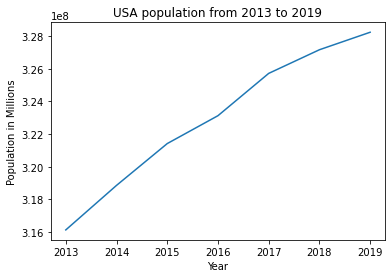

In [26]:
df2.plot(x = "Year", y="Population", legend = None)
plt.ylabel("Population in Millions")
plt.xlabel("Year")
plt.title("USA population from 2013 to 2019")

# Free API 3: Random User
information about a random fake user, including gender, name, email, address, etc.



In [27]:
rr = requests.get("https://randomuser.me/api/")

In [28]:
rr.status_code

200

In [29]:
print(rr.json())

{'results': [{'gender': 'male', 'name': {'title': 'Mr', 'first': 'Fabien', 'last': 'Da Silva'}, 'location': {'street': {'number': 9569, 'name': 'Place du 22 Novembre 1943'}, 'city': 'Caen', 'state': 'Cantal', 'country': 'France', 'postcode': 29902, 'coordinates': {'latitude': '2.8967', 'longitude': '-16.0016'}, 'timezone': {'offset': '+10:00', 'description': 'Eastern Australia, Guam, Vladivostok'}}, 'email': 'fabien.dasilva@example.com', 'login': {'uuid': '42ff4323-efa4-4bd8-a1a8-8a1ddb22426a', 'username': 'redleopard552', 'password': 'beavis', 'salt': '50PrU1FQ', 'md5': '8db2bfdc1352c2fe7fac47e8b9091df2', 'sha1': '669607b0f92a4536640cefa14205c6c740a597af', 'sha256': '93865f2f872570c9075e98b2b7e8cbc7cedd976e996e1c4eea754fef65882afd'}, 'dob': {'date': '1979-07-17T13:28:30.615Z', 'age': 42}, 'registered': {'date': '2003-08-08T04:12:45.447Z', 'age': 18}, 'phone': '05-71-12-14-68', 'cell': '06-17-14-52-46', 'id': {'name': 'INSEE', 'value': '1NNaN62951236 66'}, 'picture': {'large': 'https:/

In [30]:
def json_print(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

json_print(rr.json())

{
    "info": {
        "page": 1,
        "results": 1,
        "seed": "83914081659ea9a7",
        "version": "1.3"
    },
    "results": [
        {
            "cell": "06-17-14-52-46",
            "dob": {
                "age": 42,
                "date": "1979-07-17T13:28:30.615Z"
            },
            "email": "fabien.dasilva@example.com",
            "gender": "male",
            "id": {
                "name": "INSEE",
                "value": "1NNaN62951236 66"
            },
            "location": {
                "city": "Caen",
                "coordinates": {
                    "latitude": "2.8967",
                    "longitude": "-16.0016"
                },
                "country": "France",
                "postcode": 29902,
                "state": "Cantal",
                "street": {
                    "name": "Place du 22 Novembre 1943",
                    "number": 9569
                },
                "timezone": {
                    "descriptio

In [31]:
with open('random_users.json','w') as f:
    json.dump(rr.json(),f)

In [32]:
with open('random_users.json') as json_data:
    data2= json.load(json_data)
data2 = data2['results']

In [33]:
df = pd.DataFrame(data2)

In [34]:
df

,gender,name,location,email,login,dob,registered,phone,cell,id,picture,nat
0,male,"{'title': 'Mr', 'first': 'Fabien', 'last': 'Da...","{'street': {'number': 9569, 'name': 'Place du ...",fabien.dasilva@example.com,{'uuid': '42ff4323-efa4-4bd8-a1a8-8a1ddb22426a...,"{'date': '1979-07-17T13:28:30.615Z', 'age': 42}","{'date': '2003-08-08T04:12:45.447Z', 'age': 18}",05-71-12-14-68,06-17-14-52-46,"{'name': 'INSEE', 'value': '1NNaN62951236 66'}",{'large': 'https://randomuser.me/api/portraits...,FR


# Free API 4: Public Api
List of universities in a specified country

In [35]:
res = requests.get("https://api.publicapis.org/entries")

In [36]:
res.status_code

200

In [37]:
#print(res.json())

In [38]:
def json_print(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    #print(text)

json_print(res.json())

In [39]:
with open('publicapi.json','w') as f:
    json.dump(res.json(),f)

In [40]:
with open('publicapi.json') as json_data:
    data4 = json.load(json_data)
data4 = data4['entries']

In [41]:
df4 = pd.DataFrame(data4)

In [42]:
df4

,API,Description,Auth,HTTPS,Cors,Link,Category
0,Axolotl,Collection of axolotl pictures and facts,,True,unknown,https://theaxolotlapi.netlify.app/,Animals
1,Cat Facts,Daily cat facts,,True,no,https://alexwohlbruck.github.io/cat-facts/,Animals
2,Cataas,Cat as a service (cats pictures and gifs),,True,unknown,https://cataas.com/,Animals
3,catAPI,Random pictures of cats,,True,yes,https://github.com/ThatCopy/catAPI/wiki/Usage,Animals
4,Cats,Pictures of cats from Tumblr,apiKey,True,unknown,https://docs.thecatapi.com/,Animals
...,...,...,...,...,...,...,...
935,Troposphere,Global weather and climate data,apiKey,True,yes,https://www.troposphere.io/developer,Weather
936,Visual Crossing,Global historical and weather forecast data,apiKey,True,yes,https://www.visualcrossing.com/weather-api,Weather
937,weather-api,A RESTful free API to check the weather,,True,no,https://github.com/robertoduessmann/weather-api,Weather
938,Weatherbit,Weather,apiKey,True,unknown,https://www.weatherbit.io/api,Weather


In [43]:
df4.isnull().sum()

API            0
Description    0
Auth           0
HTTPS          0
Cors           0
Link           0
Category       0
dtype: int64

In [44]:
df4.nunique()

API            929
Description    898
Auth             5
HTTPS            2
Cors             3
Link           940
Category        47
dtype: int64

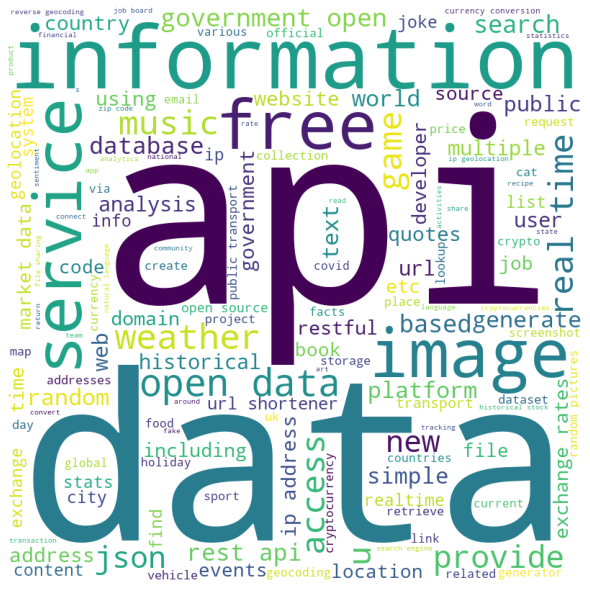

In [45]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
 
for val in df4.Description:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Free API 5: Zippopotam
Get information about a specified ZIP code.

In [46]:
req = requests.get("https://api.zippopotam.us/us/33162")

In [47]:
req.status_code

200

In [48]:
def json_print(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

json_print(req.json())

{
    "country": "United States",
    "country abbreviation": "US",
    "places": [
        {
            "latitude": "25.9286",
            "longitude": "-80.183",
            "place name": "Miami",
            "state": "Florida",
            "state abbreviation": "FL"
        }
    ],
    "post code": "33162"
}


In [49]:
with open('ip_info.json','w') as f:
    json.dump(req.json(),f)

In [50]:
with open('ip_info.json') as json_data:
    data5 = json.load(json_data)
data5 = data5

In [51]:
df5 = pd.DataFrame(data5)

In [52]:
df5

,post code,country,country abbreviation,places
0,33162,United States,US,"{'place name': 'Miami', 'longitude': '-80.183'..."
